# 1. Importing required libraries,

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import scipy.stats as sc

# 2. Reading the dataset,

In [2]:
df = pd.read_csv('Statistics hypothesis testing.csv')

In [28]:
df.head()

,Age,Gender,Height,Weight,BMI,BMI Classification,Profession,Activeness,Sleep Amount,Workout Preference,Workout Period,Diet preferences,Fruits,Fast Food,Doctor consultation (Monthly),Healthy considered
0,24,Male,183,62.0,18.5,Healthy,Student,2,6.5,Never,NaN,Vegetarian,No,1 to 7 times a week,Never,3
1,18,Female,165,55.0,20.2,Healthy,Student,2,7.5,Once a week,30,Non-vegetarian,Yes,1 to 7 times a week,More than five times,5
2,22,Female,142,42.5,21.0,Healthy,Student,1,5.5,2 to 3 times a week,30,Vegetarian,Yes,1 to 7 times a week,Never,3
3,34,Female,162,50.0,19.1,Healthy,Home - maker,1,7.5,Once a week,15,Vegetarian,Yes,1 to 7 times a week,Never,3
4,26,Male,168,106.0,37.7,Obese,Other,3,7.5,2 to 3 times a week,60,Non-vegetarian,No,1 to 7 times a week,Three to five times,3


# 3. Data Preprocessing

## 3.1. Dropping unnecessary features,

In [4]:
df.drop(['Index', 'Email ID', 'Date of Birth', 'Name of genetical disease posessed', 
         'Which health insurance provider are you enrolled with?', 'Health Insurance', 
         'Chronic Disease', 'Bedtime', 'Genetic Disease'], axis = 1, inplace = True)

## 3.2. Understanding the data,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            107 non-null    int64  
 1   Gender                         107 non-null    object 
 2   Height                         107 non-null    int64  
 3   Weight                         107 non-null    float64
 4   BMI                            107 non-null    float64
 5   BMI Classification             107 non-null    object 
 6   Profession                     107 non-null    object 
 7   Activeness                     107 non-null    int64  
 8   Sleep Amount                   107 non-null    float64
 9   Workout Preference             107 non-null    object 
 10  Workout Period                 81 non-null     object 
 11  Diet preferences               107 non-null    object 
 12  Fruits                         107 non-null    obj

In [6]:
df.describe()

,Age,Height,Weight,BMI,Activeness,Sleep Amount,Healthy considered
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,25.654206,167.130841,63.736542,22.804673,1.663551,6.537383,3.532710
std,8.190080,10.041503,13.828392,4.696012,0.999471,0.970559,0.964637
min,17.000000,142.000000,40.000000,14.200000,0.000000,4.500000,1.000000
25%,22.000000,159.500000,54.500000,19.700000,1.000000,6.000000,3.000000
50%,23.000000,168.000000,61.000000,22.300000,2.000000,6.500000,3.000000
75%,26.000000,175.000000,72.000000,24.400000,2.500000,7.500000,4.000000
max,56.000000,185.000000,106.000000,41.400000,3.000000,8.500000,5.000000


In [7]:
df.describe(include = object)

,Gender,BMI Classification,Profession,Workout Preference,Workout Period,Diet preferences,Fruits,Fast Food,Doctor consultation (Monthly)
count,107,107,107,107,81,107,107,107,107
unique,2,4,10,5,6,2,2,2,5
top,Male,Healthy,Student,Never,30,Non-vegetarian,Yes,1 to 7 times a week,Never
freq,56,72,50,26,33,57,55,77,62


## 3.3. Analysing multi-collinearity,

In [8]:
df.corr()

,Age,Height,Weight,BMI,Activeness,Sleep Amount,Healthy considered
Age,1.000000,-0.153502,0.133611,0.265125,-0.012042,-0.004293,0.090406
Height,-0.153502,1.000000,0.427903,-0.151921,0.093727,0.130173,0.138827
Weight,0.133611,0.427903,1.000000,0.820964,-0.055067,0.062245,-0.046934
BMI,0.265125,-0.151921,0.820964,1.000000,-0.112624,-0.002937,-0.136547
Activeness,-0.012042,0.093727,-0.055067,-0.112624,1.000000,0.003363,0.217007
Sleep Amount,-0.004293,0.130173,0.062245,-0.002937,0.003363,1.000000,0.250593
Healthy considered,0.090406,0.138827,-0.046934,-0.136547,0.217007,0.250593,1.000000


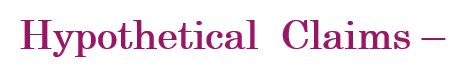

# CLAIM 01 - 
# Test whether the BMI of people with age > 28 is more variable than those with age < 28

In [9]:
df['Age'].value_counts()

22    31
23    10
24     9
21     8
20     8
27     7
26     5
25     4
28     3
18     3
54     2
32     2
19     2
43     1
35     1
52     1
49     1
50     1
41     1
34     1
56     1
48     1
17     1
29     1
31     1
37     1
Name: Age, dtype: int64

In [10]:
df4 = df[df['Age']< 28]
df5 = df[df['Age']>= 28]

In [11]:
alpha = 0.01
n1 = len(df5['BMI'])
print('n1 =', n1)

n2 = len(df4['BMI'])
print('n2 =', n2)

sd1 = np.sqrt(stats.variance(df5['BMI']))
print('sd1 = ', sd1)

sd2 = np.sqrt(stats.variance(df4['BMI']))
print('sd2 =', sd2)

#F-variate,
F = sd1**2/sd2**2
print('Fvariate =', F)

#Falpha,
F_alpha = sc.f.ppf(alpha, dfn = n1-1, dfd = n2-1)
print('F_alpha =', F_alpha)


if F > F_alpha:
    print('\n','Reject Ho and we accept that there is more variation in the BMI of people with age>28 than with age<28.')
else:
    print('Failed to reject Ho')

n1 = 19
n2 = 88
sd1 =  4.9391265179416
sd2 = 4.578256616531336
Fvariate = 1.163858113400396
F_alpha = 0.37117620287023445

 Reject Ho and we accept that there is more variation in the BMI of people with age>28 than with age<28.


# CLAIM 02 - 
## Check whether the average BMI is same for both the diet preferences?

In [12]:
Nonveg = df[df['Diet preferences']=='Non-vegetarian']
Veg = df[df['Diet preferences']=='Vegetarian']

In [13]:
μo = 0
alpha = 0.01

mean1 = np.mean(Nonveg['BMI'])
print('mean1 =', mean1)
mean2 = np.mean(Veg['BMI'])
print('mean2 =', mean2)

SD1 = np.sqrt(stats.variance(Nonveg['BMI']))
print('SD1 =', SD1)
SD2 = np.sqrt(stats.variance(Veg['BMI']))
print('SD2 =', SD2)

n1 = len(Nonveg['BMI'])
print('n1 =', n1)
n2 = len(Veg['BMI'])
print('n2 =', n2)

#t-variate,
t = abs(((mean1 - mean2) - μo)/ np.sqrt((SD1**2/n1) + (SD2**2/n2)))
print('t-variate =', t)

#t-alphaby2
t_alphaby2 = sc.t.ppf(alpha/2, df = n1 + n2 - 2)
print('t_alphaby2 =', t_alphaby2)

if t > t_alphaby2:
    print('\n', 'Reject Ho and we accept that the average BMI is not same for both the diet preferences.')
else:
    print('Failed to reject Ho')

mean1 = 22.992982456140354
mean2 = 22.58999999999999
SD1 = 4.8414453143487615
SD2 = 4.56388887163711
n1 = 57
n2 = 50
t-variate = 0.4429174159825155
t_alphaby2 = -2.623465495230997

 Reject Ho and we accept that the average BMI is not same for both the diet preferences.


## CLAIM 03 - 
# Claim that the males have meaner BMI than females for age < 28.

In [14]:
Males = df4[df4['Gender']=='Male']
Females = df4[df4['Gender']=='Female']

In [15]:
μo = 0
alpha = 0.01

mean1 = np.mean(Males['BMI'])
print('mean1 =', mean1)
mean2 = np.mean(Females['BMI'])
print('mean2 =', mean2)

SD1 = np.sqrt(stats.variance(Males['BMI']))
print('SD1 =', SD1)
SD2 = np.sqrt(stats.variance(Females['BMI']))
print('SD2 =', SD2)

n1 = len(Males['BMI'])
print('n1 =', n1)
n2 = len(Females['BMI'])
print('n2 =', n2)

#t-variate,
t = abs(((mean1 - mean2) - μo)/ np.sqrt((SD1**2/n1) + (SD2**2/n2)))
print('t-variate =', t)

#t-alpha
t_alpha = sc.t.ppf(alpha, df = n1 + n2 - 2)
print('t_alphaby2 =', t_alpha)

if t > -t_alpha:
    print('Reject Ho')
else:
    print('\n', 'Failed to reject Ho as we dont have strong evidence to reject the fact that', 
          'males have more mean BMI than females for age<28.')

mean1 = 22.415686274509806
mean2 = 22.416216216216213
SD1 = 3.9862449773700366
SD2 = 5.346468902904956
n1 = 51
n2 = 37
t-variate = 0.0005089639890962236
t_alphaby2 = -2.370493224836108

 Failed to reject Ho as we dont have strong evidence to reject the fact that males have more mean BMI than females for age<28.


## 4. Does consuming fruits everyday suggests that the person is healthy i.e. they have an average BMI > 18.5

In [16]:
Consuming_fruits_everyday = df[df['Fruits']=='Yes']
Consuming_fruits_everyday.shape

(55, 16)

In [17]:
μo = 18.5
alpha = 0.01

mean = np.mean(Consuming_fruits_everyday['BMI'])
print('Mean = ', mean)

SD = np.sqrt(stats.variance(Consuming_fruits_everyday['BMI']))
print('SD = ', SD)

n = len(Consuming_fruits_everyday['BMI'])
print('n = ', n)


#t-variate,
t = abs(((mean1 - mean2) - μo)/ np.sqrt((SD1**2/n1) + (SD2**2/n2)))
print('t-variate =', t)

#t-alphaby2
t_alphaby2 = sc.t.ppf(alpha/2, df = n1 + n2 - 2)
print('t_alphaby2 =', t_alphaby2)

if t > t_alphaby2:
    print('\n', 'Reject Ho,' '\n', 
          'We accept that the average BMI of fruit consumers is greater that 18.5, ie. are healthy according to the BMI studies.')
else:
    print('Failed to reject Ho')

Mean =  22.76363636363636
SD =  4.5217729903690405
n =  55
t-variate = 17.76818734151118
t_alphaby2 = -2.634212307633056

 Reject Ho,
 We accept that the average BMI of fruit consumers is greater that 18.5, ie. are healthy according to the BMI studies.


## 5. Is there a significant difference in the proportion of BMI of the students getting sleep less than 7 hours and greater than 7 hours? 

In [18]:
df['Profession'].value_counts()

Student         50
Employee        33
Other            7
Academic         6
Home - maker     5
Business         2
Pharmacist       1
Accountant       1
Dancer           1
BUSINESS         1
Name: Profession, dtype: int64

In [19]:
df1 = df[df['Profession']=='Student']
df1.shape

(50, 16)

In [20]:
df1['Sleep Amount'].value_counts()

6.5    17
7.5    17
5.5    10
4.5     5
8.5     1
Name: Sleep Amount, dtype: int64

In [21]:
n1 = 50
n2 = 50
alpha = 0.01

p1 = 32/50
p2 = 18/50

Po = (n1*p1 + n2*p2)/(n1+n2)
print('Po =', Po)


# t-variate,
t = abs((p1 - p2)/np.sqrt(((Po*(1-Po))/n1) + (Po*(1-Po))/n2))
print('t-variate =', t)


# t (1-alpha/2),
t_alphaby2 = sc.t.ppf(1-alpha/2, df = n1 + n2 - 2)
print('t_alphaby2 =', t_alphaby2)


if t > t_alphaby2:
    print('\n','Reject Ho and we accept that there is no significant difference in','\n', 'the proportion of BMI of the students getting sleep less than 7 hours and greater than 7 hours')
else:
    print('Failed to reject Ho')

Po = 0.5
t-variate = 2.8000000000000003
t_alphaby2 = 2.626931094814024

 Reject Ho and we accept that there is no significant difference in 
 the proportion of BMI of the students getting sleep less than 7 hours and greater than 7 hours


## 6. Test whether the BMI of people working out daily appear to be more variable than those who never workout.

In [22]:
df['Workout Preference'].value_counts()

Never                  26
Once a week            26
Everyday               21
2 to 3 times a week    18
4 to 6 times a week    16
Name: Workout Preference, dtype: int64

In [23]:
df2 = df[df['Workout Preference']=='Never']
df3 = df[df['Workout Preference']=='Everyday']

In [24]:
alpha = 0.01
n1 = len(df3['BMI'])
print('n1 =', n1)

n2 = len(df2['BMI'])
print('n2 =', n2)

sd1 = np.sqrt(stats.variance(df3['BMI']))
print('sd1 = ', sd1)

sd2 = np.sqrt(stats.variance(df2['BMI']))
print('sd2 =', sd2)

#F-variate,
F = sd1**2/sd2**2
print('Fvariate =', F)

#F 1-alpha,
F_alpha = sc.f.ppf(alpha, dfn = n1-1, dfd = n2-1)
print('F_alpha =', F_alpha)


if F > F_alpha:
    print('\n','Reject Ho and we accept the fact that BMI of people working out daily appear to be more variable than those who never workout.')
else:
    print('Failed to reject Ho')

n1 = 21
n2 = 26
sd1 =  3.429938219629647
sd2 = 5.464015148081265
Fvariate = 0.39404770799876976
F_alpha = 0.35169185621205384

 Reject Ho and we accept the fact that BMI of people working out daily appear to be more variable than those who never workout.


In [25]:
np.mean(df3['BMI'])

20.9047619047619

In [26]:
np.mean(df2['BMI'])

24.211538461538456